# Data Scrapping and importing libraries


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [6]:
url = 'https://inshorts.com/en/read/technology'

In [7]:
news_data = []

In [8]:
news_category = url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'technology']

In [9]:
news_category = news_category[-1]
news_category

'technology'

In [10]:
data = requests.get(url)
data.content

b'<!doctype html>\n<html lang="en">\n\n<head>\n  <meta charset="utf-8" />\n  <style>\n    /* The Modal (background) */\n    .modal_contact {\n        display: none; /* Hidden by default */\n        position: fixed; /* Stay in place */\n        z-index: 8; /* Sit on top */\n        left: 0;\n        top: 0;\n        width: 100%; /* Full width */\n        height: 100%;\n        overflow: auto; /* Enable scroll if needed */\n        background-color: rgb(0,0,0); /* Fallback color */\n        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */\n    }\n\n    /* Modal Content/Box */\n    .modal-content {\n        background-color: #fefefe;\n        margin: 15% auto;\n        padding: 20px !important;\n        padding-top: 0 !important;\n        /* border: 1px solid #888; */\n        text-align: center;\n        position: relative;\n        border-radius: 6px;\n    }\n\n    /* The Close Button */\n    .close {\n      left: 90%;\n      color: #aaa;\n      float: right;\n      font-size: 

In [11]:
soup = BeautifulSoup(data.content, 'html.parser')

In [12]:
news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('div', 
                                                            class_ = ['news-card-title news-right-box']), 
                                              soup.find_all('div', class_=['news-card-content news-right-box']))]

In [13]:
news_data.extend(news_articles)
news_data

[{'news_headline': 'Singapore provisionally approves 60-second COVID-19 breath test',
  'news_article': "Singapore has provisionally approved a COVID-19 breath test that can detect if someone is infected with COVID-19 within 60 seconds. The test, developed by the National University of Singapore's spin-off Breathonix, achieved more than 90% accuracy in a Singapore-based pilot clinical trial last year. A trial of the technology is now expected at one of Singapore's border points with Malaysia.",
  'news_category': 'technology'},
 {'news_headline': "Gates' trust sold all Apple, Twitter shares weeks before divorce announcement",
  'news_article': 'The Bill & Melinda Gates Foundation sold its entire stakes in Apple and Twitter, weeks before the Gates announced their divorce earlier this month. The trust sold 1 million of shares it owned in Apple at the end of 2020 and 272,420 Twitter shares. Since the divorce announcement, about $4 billion in stock has been transferred from Bill to Melinda

In [14]:
df = pd.DataFrame(news_data)

In [15]:
df = df[['news_headline', 'news_article', 'news_category']]

In [16]:
df.head(5)

,news_headline,news_article,news_category
0,Singapore provisionally approves 60-second COV...,Singapore has provisionally approved a COVID-1...,technology
1,"Gates' trust sold all Apple, Twitter shares we...",The Bill & Melinda Gates Foundation sold its e...,technology
2,Trick to relaunch PUBG Mobile: MLA urges PM to...,"Ninong Ering, an MLA from Arunachal Pradesh, h...",technology
3,Paytm CEO shares old video of Google's ex-CEO ...,Paytm CEO Vijay Shekhar Sharma took to Twitter...,technology
4,Delhi Police sends notice to Twitter over 'man...,Delhi Police has sent a notice to Twitter dema...,technology


In [17]:
df.shape

(25, 3)

# Prepare user defined function to extract data from inshorts.com

## I have taken five different categories of news from inshorts.com

In [18]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world',
            'https://inshorts.com/en/read/travel',
           'https://inshorts.com/en/read/science']

In [19]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span', attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles) 
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df    

In [20]:
news_df = datasetPrepare(urls_list)

In [21]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_headline  123 non-null    object
 1   news_article   123 non-null    object
 2   news_category  123 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [22]:
news_df.head(5)

,news_headline,news_article,news_category
0,Singapore provisionally approves 60-second COV...,Singapore has provisionally approved a COVID-1...,technology
1,Delhi Police sends notice to Twitter over 'man...,Delhi Police has sent a notice to Twitter dema...,technology
2,Trick to relaunch PUBG Mobile: MLA urges PM to...,"Ninong Ering, an MLA from Arunachal Pradesh, h...",technology
3,"Gates' trust sold all Apple, Twitter shares we...",The Bill & Melinda Gates Foundation sold its e...,technology
4,Delhi Police carries out raids at Twitter Indi...,A Delhi Police Special Cell team on Monday car...,technology


In [23]:
news_df.news_category.value_counts()

technology    25
sports        25
world         25
science       24
travel        24
Name: news_category, dtype: int64

# Text Wrangling and Pre-processing

In [24]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata
import os

In [26]:
nlp = spacy.load("en_core_web_sm")

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

## Remove HTML tags

In [29]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

## Remove accented characters

In [30]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Remove special characters

In [31]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [32]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [33]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [34]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'my system keep crash ! his crashed yesterday , ours crash daily'

## Text stemming

In [35]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

## Remove stopwords

In [36]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text normalizer

In [37]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Pre-process and normalize news articles

In [38]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [39]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': "Delhi Police sends notice to Twitter over 'manipulated' tag on BJP leader's tweet. Delhi Police has sent a notice to Twitter demanding an explanation for adding the 'manipulated media' tag on tweets by BJP leader Sambit Patra on the alleged Congress 'toolkit' against PM Narendra Modi. It asked Twitter to share the information that it has in regard to the alleged toolkit and explain why it used the tag.",
 'clean_text': 'delhi police send notice twitter manipulate tag bjp leader tweet delhi police send notice twitter demand explanation add manipulated medium tag tweet bjp leader sambit patra alleged congress toolkit pm narendra modi ask twitter share information regard alleged toolkit explain use tag'}

# Save the news articles

In [40]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

# Tagging Parts of Speech

In [41]:
news_df = pd.read_csv('news.csv')

In [42]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

In [43]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,Delhi,NNP,PROPN
1,Police,NNPS,PROPN
2,sends,VBZ,VERB
3,notice,NN,NOUN
4,to,IN,ADP
5,Twitter,NNP,PROPN
6,over,IN,ADP
7,',``,PUNCT
8,manipulated,VBN,VERB
9,','',PUNCT


In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [46]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [47]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [48]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,Delhi,NNP
1,Police,NNP
2,sends,VBZ
3,notice,NN
4,to,TO
5,Twitter,NNP
6,over,IN
7,'manipulated',NNP
8,tag,NN
9,on,IN


# Named Entity Recognition

In [49]:
sentence = str(news_df.iloc[1].full_text)

In [50]:
sentence

"Delhi Police sends notice to Twitter over 'manipulated' tag on BJP leader's tweet. Delhi Police has sent a notice to Twitter demanding an explanation for adding the 'manipulated media' tag on tweets by BJP leader Sambit Patra on the alleged Congress 'toolkit' against PM Narendra Modi. It asked Twitter to share the information that it has in regard to the alleged toolkit and explain why it used the tag."

In [51]:
sentence_nlp = nlp(sentence)

In [52]:
sentence_nlp

Delhi Police sends notice to Twitter over 'manipulated' tag on BJP leader's tweet. Delhi Police has sent a notice to Twitter demanding an explanation for adding the 'manipulated media' tag on tweets by BJP leader Sambit Patra on the alleged Congress 'toolkit' against PM Narendra Modi. It asked Twitter to share the information that it has in regard to the alleged toolkit and explain why it used the tag.

In [53]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(Delhi, 'PERSON'), (Police, 'PERSON'), (Twitter, 'PRODUCT'), (BJP, 'ORG'), (Delhi, 'PERSON'), (Police, 'PERSON'), (BJP, 'ORG'), (Sambit, 'PERSON'), (Patra, 'PERSON'), (Congress, 'ORG'), (Narendra, 'PERSON'), (Modi, 'PERSON'), (Twitter, 'PRODUCT')]


In [54]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [55]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,India,China,US,COVID-19,first,two,Monday,Singapore,New Zealand,Delhi Police,Brazil,Russia,COVID-19,Sushil,Moon
Entity Type,GPE,GPE,GPE,PERSON,ORDINAL,CARDINAL,DATE,GPE,GPE,PERSON,GPE,GPE,PRODUCT,PERSON,PERSON
Frequency,35,15,14,13,12,9,7,7,7,6,6,6,6,6,6


In [56]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,PERSON,ORG,GPE,DATE,CARDINAL,NORP,ORDINAL,LOC,MONEY,PRODUCT,TIME,PERCENT,QUANTITY,EVENT,WORK_OF_ART
Frequency,230,212,183,150,103,43,26,25,16,16,15,14,13,10,7


# Emotion and Sentiment Analysis

In [57]:
from afinn import Afinn

In [58]:
af = Afinn()

In [59]:
sentiment_scores = [af.score(article) for article in corpus]

In [60]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [61]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T

In [62]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [63]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [83]:
df

,news_category,sentiment_score,sentiment_category
0,technology,-0.200,negative
1,technology,-0.100,negative
2,technology,-0.017,negative
3,technology,0.050,positive
4,technology,0.089,positive
...,...,...,...
118,science,0.000,neutral
119,science,0.000,neutral
120,science,0.250,positive
121,science,0.125,positive


In [64]:
df.groupby(by=['news_category']).describe()

sentiment_score                                                 
                        count      mean       std   min   25%  50%   75%   max
news_category                                                                 
science                  24.0  0.875000  2.908944  -4.0 -0.25  0.0  2.25  10.0
sports                   25.0  1.920000  8.726970 -14.0 -1.00  0.0  5.00  26.0
technology               25.0  2.000000  7.262920  -8.0 -2.00  0.0  5.00  19.0
travel                   24.0 -0.416667  3.610572  -6.0 -3.00 -1.0  1.00  10.0
world                    25.0 -4.200000  6.763875 -19.0 -8.00 -6.0  2.00   6.0

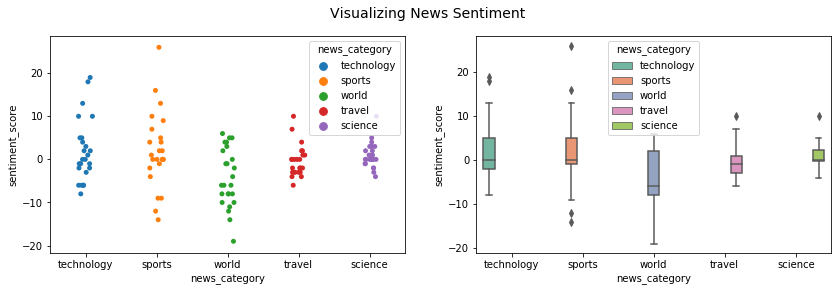

In [65]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

C:\Users\mishr\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


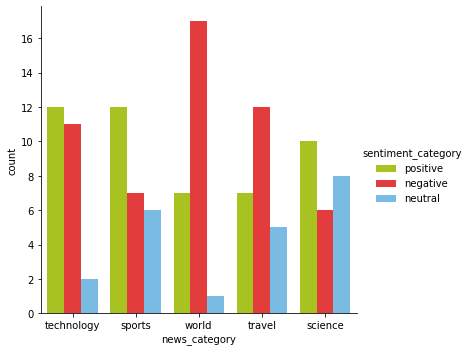

In [66]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [67]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 2)].index[0]

In [68]:
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -2)].index[0]

In [69]:
print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: Delhi Police has sent a notice to Twitter demanding an explanation for adding the 'manipulated media' tag on tweets by BJP leader Sambit Patra on the alleged Congress 'toolkit' against PM Narendra Modi. It asked Twitter to share the information that it has in regard to the alleged toolkit and explain why it used the tag.

Most Positive Tech News Article: Singapore has provisionally approved a COVID-19 breath test that can detect if someone is infected with COVID-19 within 60 seconds. The test, developed by the National University of Singapore's spin-off Breathonix, achieved more than 90% accuracy in a Singapore-based pilot clinical trial last year. A trial of the technology is now expected at one of Singapore's border points with Malaysia.


In [70]:
df1 = df[df.news_category=='world']
pd.unique(df1.sentiment_score)

array([ -4.,   2.,   5., -12.,  -6.,  -2.,  -8., -11.,  -1.,   4.,   6.,
         3., -14., -10., -19.,   0.])

In [71]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 4)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -4.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: Indian High Commission (IHC) in Islamabad on Monday clarified that an official's spouse, who was reported to have been tested COVID-19 positive by Pakistani media, has tested COVID-19 negative upon her arrival. Earlier, Pakistan asked the officials to quarantine, along with their families and drivers. All 12 passengers reportedly carried negative Polymerase Chain Reaction COVID-19 reports.

Most Positive World News Article: Russia's Sputnik V COVID-19 vaccine is "highly effective" against coronavirus variant first discovered in Brazil, according to the Russian Direct Investment Fund (RDIF) and a study conducted in Argentina. According to the study, 85.5% of individuals developed antibodies against the variant 14 days after taking the first dose. The variant was behind a surge in COVID-19 cases in Brazil.


In [72]:
from textblob import TextBlob

In [73]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]

In [74]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [75]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                              \
                        count      mean       std    min      25%     50%   
news_category                                                               
science                  24.0  0.052000  0.139853 -0.267 -0.00225  0.0375   
sports                   25.0  0.080440  0.160979 -0.183 -0.00800  0.0450   
technology               25.0  0.046040  0.168054 -0.500 -0.01700  0.0500   
travel                   24.0  0.073833  0.123785 -0.125  0.00000  0.0520   
world                    25.0  0.030480  0.191862 -0.225 -0.10000  0.0080   

                               
                   75%    max  
news_category                  
science        0.10925  0.387  
sports         0.19200  0.431  
technology     0.12700  0.283  
travel         0.14650  0.400  
world          0.14800  0.500

In [76]:
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,-0.200,negative
1,technology,-0.100,negative
2,technology,-0.017,negative
3,technology,0.050,positive
4,technology,0.089,positive


C:\Users\mishr\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


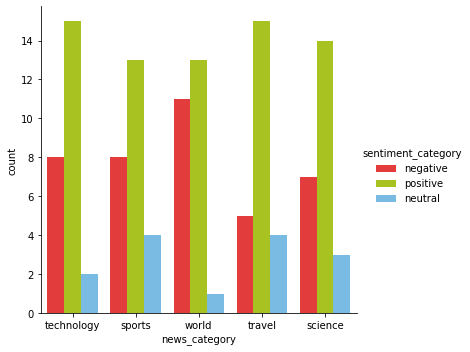

In [77]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [78]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score > 0.)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score < -0.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: Singapore has provisionally approved a COVID-19 breath test that can detect if someone is infected with COVID-19 within 60 seconds. The test, developed by the National University of Singapore's spin-off Breathonix, achieved more than 90% accuracy in a Singapore-based pilot clinical trial last year. A trial of the technology is now expected at one of Singapore's border points with Malaysia.

Most Positive World News Article: Indian High Commission (IHC) in Islamabad on Monday clarified that an official's spouse, who was reported to have been tested COVID-19 positive by Pakistani media, has tested COVID-19 negative upon her arrival. Earlier, Pakistan asked the officials to quarantine, along with their families and drivers. All 12 passengers reportedly carried negative Polymerase Chain Reaction COVID-19 reports.
